# Projet Data : détection de fraude lors des transactions bancaires

DataSource : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


<!-- C:\Users\franc\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3 -->

Fichier de 147 Mo, trop lourd pour GitHub ; importer avec :

In [93]:
import kagglehub

#path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
path = "C:/Users/franc/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv" # à effacer

print("Path to dataset files:", path)

Path to dataset files: C:/Users/franc/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv


### Imports

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from collections import Counter

In [95]:
data = pd.read_csv(path)

### Analyse Data Exploratoire

In [96]:
print(data.head())

print(f"Nombre de lignes : {data.shape[0]}")
print(f"Nombre de colonnes : {data.shape[1]}")

print(data.info())
print(data.isnull().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

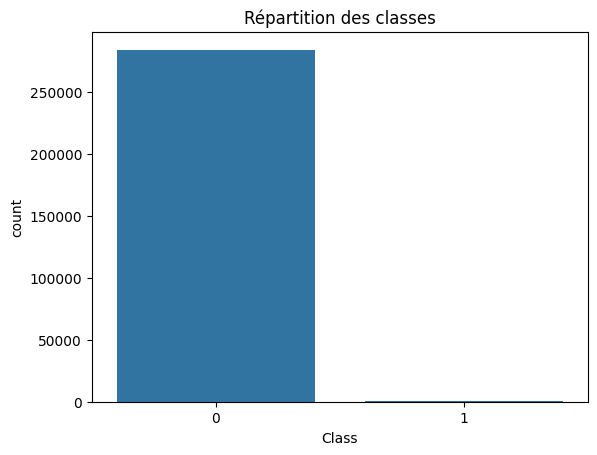

Taux de fraudes : 0.1727%


In [97]:
print(data.describe())

# Répartition des classes (0 = normale, 1 = fraude)
print(data['Class'].value_counts())
sns.countplot(data=data, x='Class')
plt.title("Répartition des classes")
plt.show()

# Pourcentage de fraudes
fraud_rate = data['Class'].mean() * 100
print(f"Taux de fraudes : {fraud_rate:.4f}%")


Les classes sont très désiquilibrées, avec seulement 0,1727% de transactions frauduleuses.

*Remarque : le taux de fraudeannoncé par Kaggle est de 17%, on est bien cohérent*

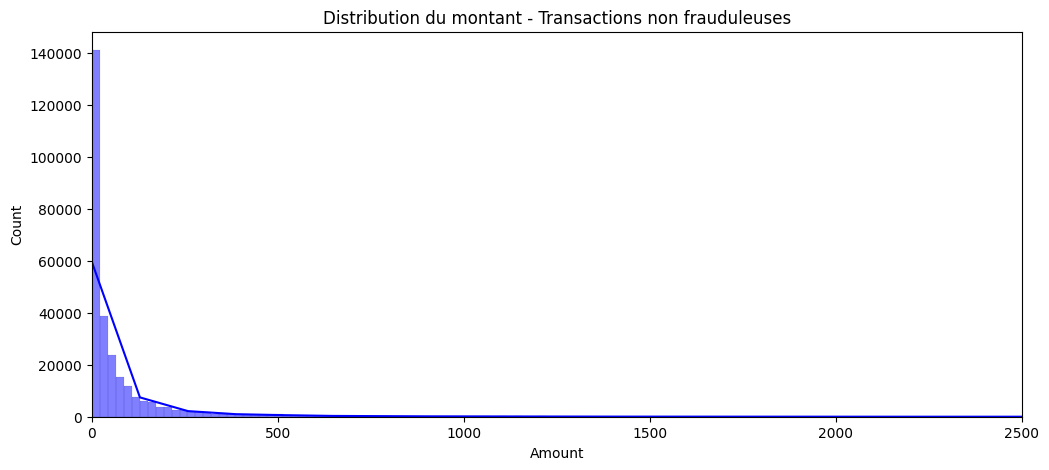

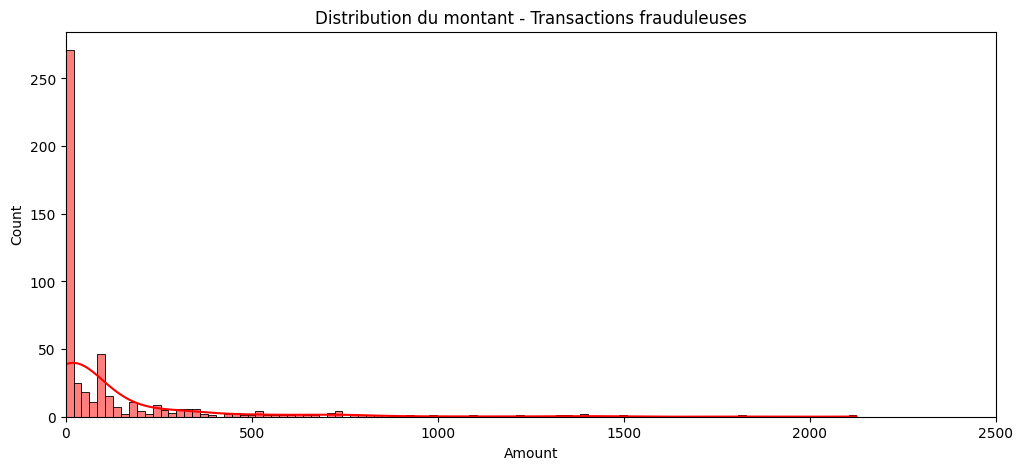

In [98]:
# Distribution du montant pour les non-fraudes
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=1200, color='blue', kde=True)
plt.title("Distribution du montant - Transactions non frauduleuses")
plt.xlim(0, 2500) 
plt.show()

# Distribution du montant pour les fraudes
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 1]['Amount'], bins=100, color='red', kde=True)
plt.title("Distribution du montant - Transactions frauduleuses")
plt.xlim(0, 2500) 
plt.show()

*Remarque : il n'y a pas de fraude dans le dataset au delà de 2500€. On se limite donc à l'étude de cette plage, m^eme si certaines transactions non frauduleuses ont un montant bien plus élevé.*

On observe que les fraudes sont essentiellement faites sur des petits montants (0-20€), avec un pic notable aux alentours de 100€

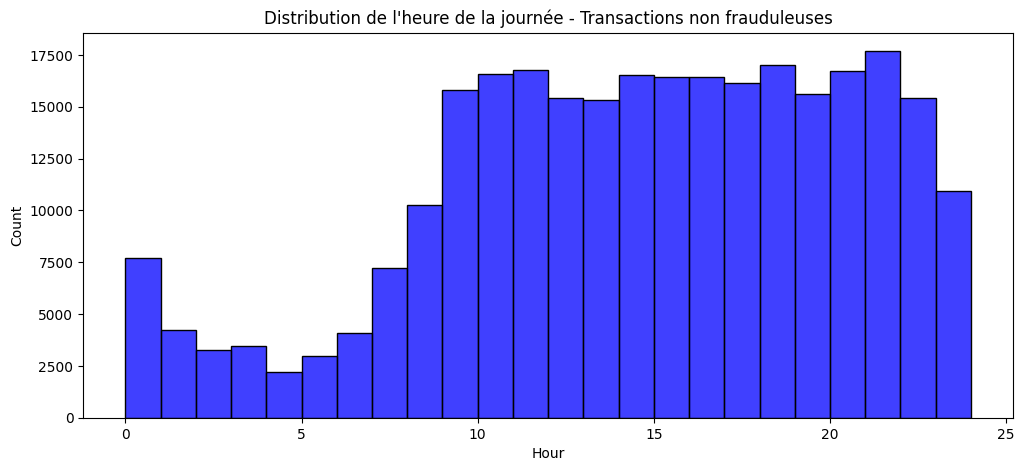

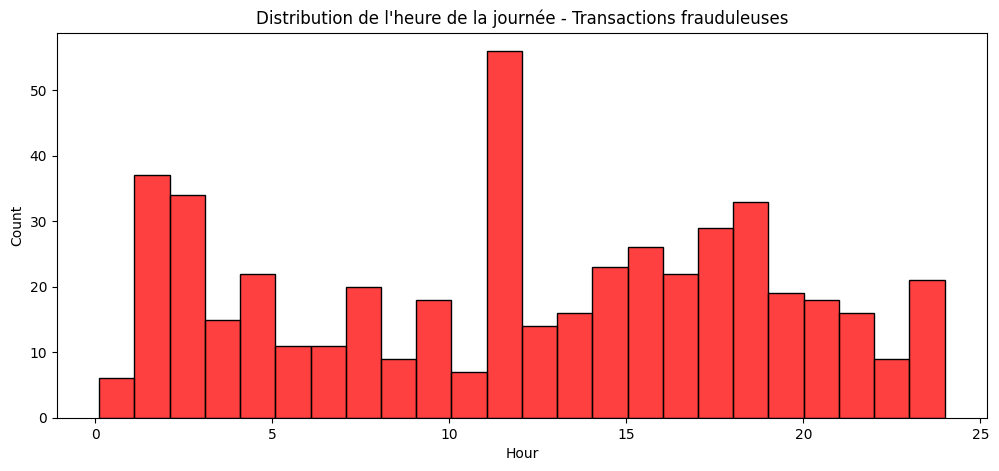

In [99]:
data['Hour'] = (data['Time'] / 3600) % 24

# Distribution des fraudes par heure
#plt.figure(figsize=(10,5))
#sns.histplot(data[data['Class'] == 0]['Hour'], bins=24, label='Non-fraude', color='blue')
#sns.histplot(data[data['Class'] == 1]['Hour'], bins=24, label='Fraude', color='red')
#plt.title("Heure de la journée vs Classe")
#plt.xlabel("Heure (0 à 24)")
#plt.legend()
#plt.show()

# Distribution du montant pour les non-fraudes
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 0]['Hour'], bins=24, label='Non-fraude', color='blue')
plt.title("Distribution de l'heure de la journée - Transactions non frauduleuses")
plt.show()

# Distribution du montant pour les fraudes
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 1]['Hour'], bins=24, label='Fraude', color='red')
plt.title("Distribution de l'heure de la journée - Transactions frauduleuses")
plt.show()


On observe un pic des fraudes entre 1 et 3 heures du matin ainsi qu'entre 11h et midi.

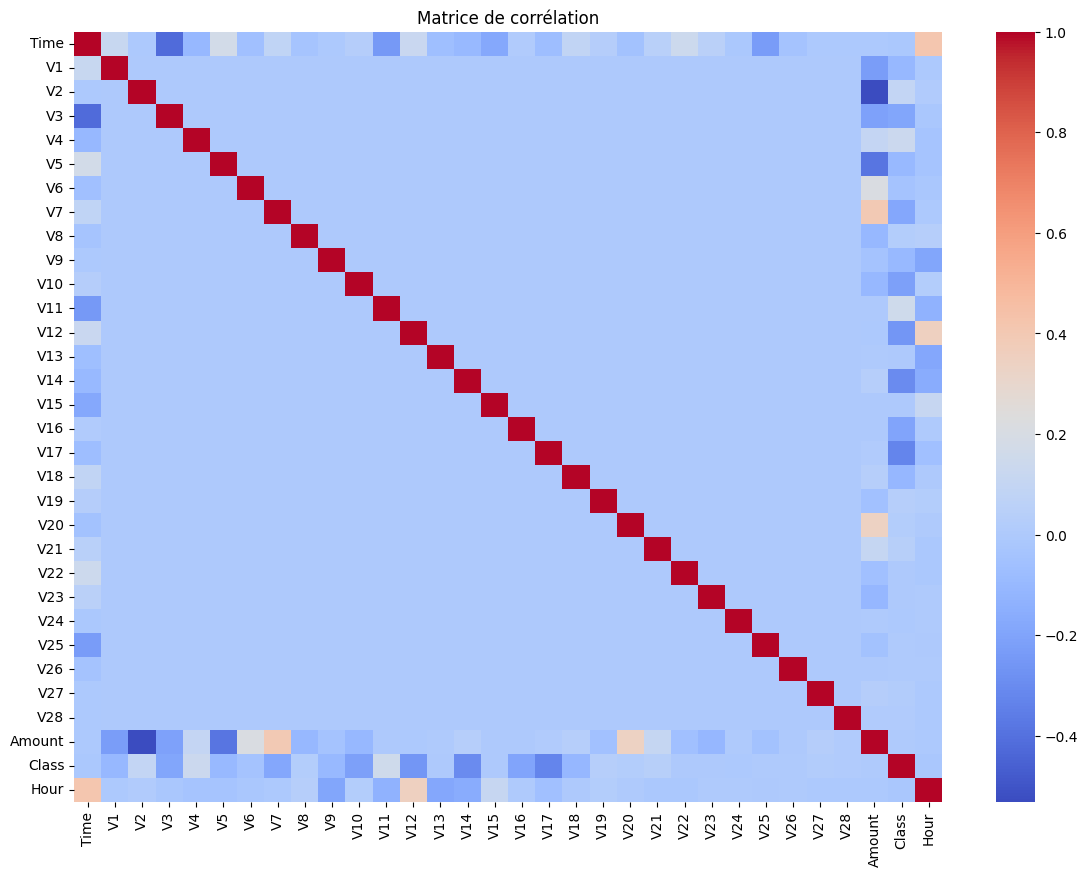

Corrélation avec la variable 'Class':
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
Hour     -0.017082
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [100]:
# Matrice de corrélation
plt.figure(figsize=(14,10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

# Corrélation avec la variable fraude/non fraude (class)
fraude_corr = corr['Class'].sort_values(ascending=False)
print("Corrélation avec la variable 'Class':")
print(fraude_corr)
#print(fraude_corr.head(10))
#print(fraude_corr.tail(10))


### Feature engineering

In [101]:
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [102]:
data['Hour_Scaled'] = scaler.fit_transform(data['Hour'].values.reshape(-1, 1))

In [103]:
corr = data.corr()['Class'].abs().sort_values()#ascending=False)

top_features = corr[1:11].index  
print("10 features les plus corrélées avec la fraude :")
print(top_features)

10 features les plus corrélées avec la fraude :
Index(['V23', 'V25', 'V15', 'V26', 'V13', 'Amount_Scaled', 'Amount', 'V24',
       'V28', 'Time'],
      dtype='object')


### Modélisation

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


In [105]:
X = data.drop(columns=['Class'])
y = data['Class']

# Séparation 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [106]:
# Modèle avec pondération automatique (pour de gérer le déséquilibre de classes)
rf = RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Prédiction
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


In [107]:
# Matrice de confusion
print(confusion_matrix(y_test, y_pred))

# Rapport complet
print(classification_report(y_test, y_pred, digits=4))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC : {roc_auc:.4f}")


[[56860     4]
 [   24    74]]
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56864
           1     0.9487    0.7551    0.8409        98

    accuracy                         0.9995     56962
   macro avg     0.9741    0.8775    0.9203     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC AUC : 0.9385


Matrice de confusion très rassurante ; le modèle repère près de 75% des fraudes et donne peu de faux positifs

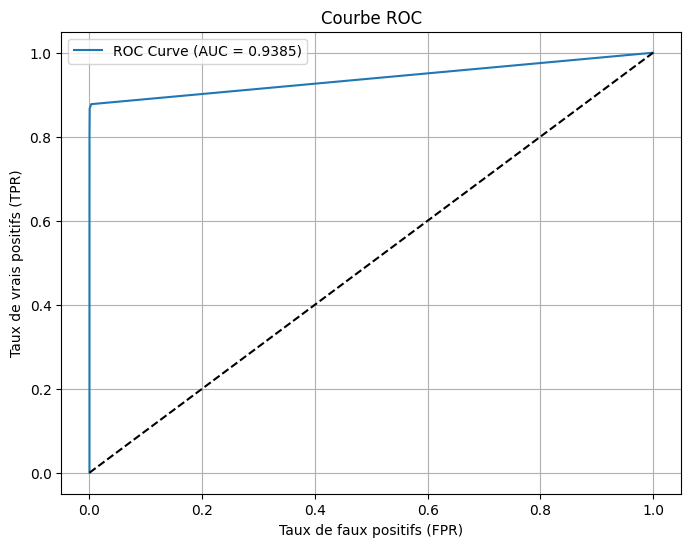

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.grid(True)
plt.show()


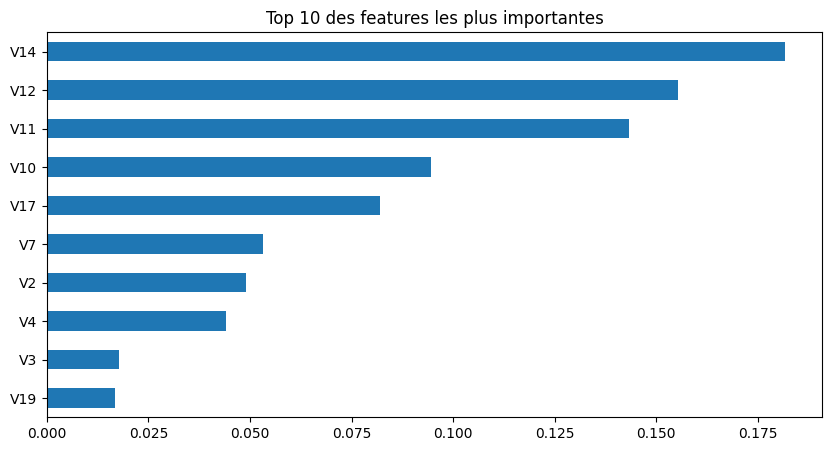

In [109]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,5))
feature_importances[:10].plot(kind='barh')
plt.title("Top 10 des features les plus importantes")
plt.gca().invert_yaxis()
plt.show()


### Export vers Docker

In [ ]:
import os
import joblib

joblib.dump(rf, "model/model.pkl")


['model/model.pkl']

In [114]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Charger le modèle
model = joblib.load("model/model.pkl")

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    df = pd.DataFrame([data])  # Un seul enregistrement à la fois
    prediction = model.predict(df)[0]
    proba = model.predict_proba(df)[0][1]
    return jsonify({
        "prediction": int(prediction),
        "fraud_probability": round(float(proba), 4)
    })

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.88:5000
Press CTRL+C to quit
